In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
%matplotlib inline

In [2]:
DataLabels=['age','workclass','fnlwqt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [3]:
data=pd.read_csv("adult.data", header=None, names=DataLabels, sep=',\s', na_values=["?"])

<ipython-input-3-c86b420ac82d>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_csv("adult.data", header=None, names=DataLabels, sep=',\s', na_values=["?"])


In [4]:
data.head()

age         workclass  fnlwqt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [5]:
data.columns=['age','workclass','fnlwqt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [6]:
data.head()

age         workclass  fnlwqt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [7]:
data.to_csv('adult_data.csv')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwqt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.describe()

age        fnlwqt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

In [10]:
import pandas_profiling

In [11]:
pandas_profiling.ProfileReport(data)

In [12]:
pfr = pandas_profiling.ProfileReport(data)
pfr.to_file("adult.html")

In [13]:
data=data.drop_duplicates()

In [14]:
print(data.isnull().sum())

age                  0
workclass         1836
fnlwqt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64


In [15]:
data1=data.dropna()

In [16]:
print(data1.isnull().sum())

age               0
workclass         0
fnlwqt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwqt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education-num   32537 non-null  int64 
 5   marital-status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital-gain    32537 non-null  int64 
 11  capital-loss    32537 non-null  int64 
 12  hours-per-week  32537 non-null  int64 
 13  native-country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [18]:
test=pd.read_csv("adult.test", header=None, names=DataLabels, sep=',\s', na_values=["?"])

<ipython-input-18-c7db1ee98cfc>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test=pd.read_csv("adult.test", header=None, names=DataLabels, sep=',\s', na_values=["?"])


In [19]:
test.head()

age  workclass    fnlwqt     education  education-num  \
0  |1x3 Cross validator       None       NaN          None            NaN   
1                    25    Private  226802.0          11th            7.0   
2                    38    Private   89814.0       HS-grad            9.0   
3                    28  Local-gov  336951.0    Assoc-acdm           12.0   
4                    44    Private  160323.0  Some-college           10.0   

       marital-status         occupation relationship   race   sex  \
0                None               None         None   None  None   
1       Never-married  Machine-op-inspct    Own-child  Black  Male   
2  Married-civ-spouse    Farming-fishing      Husband  White  Male   
3  Married-civ-spouse    Protective-serv      Husband  White  Male   
4  Married-civ-spouse  Machine-op-inspct      Husband  Black  Male   

   capital-gain  capital-loss  hours-per-week native-country  income  
0           NaN           NaN             NaN           None    None  
1           0.0           0.0            40.0  United-States  <=50K.  
2           0.0           0.0            50.0  United-States  <=50K.  
3           0.0           0.0            40.0  United-States   >50K.  
4        7688.0           0.0            40.0  United-States   >50K.

In [20]:
test.columns=['age','workclass','fnlwqt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [21]:
test.head()

age  workclass    fnlwqt     education  education-num  \
0  |1x3 Cross validator       None       NaN          None            NaN   
1                    25    Private  226802.0          11th            7.0   
2                    38    Private   89814.0       HS-grad            9.0   
3                    28  Local-gov  336951.0    Assoc-acdm           12.0   
4                    44    Private  160323.0  Some-college           10.0   

       marital-status         occupation relationship   race   sex  \
0                None               None         None   None  None   
1       Never-married  Machine-op-inspct    Own-child  Black  Male   
2  Married-civ-spouse    Farming-fishing      Husband  White  Male   
3  Married-civ-spouse    Protective-serv      Husband  White  Male   
4  Married-civ-spouse  Machine-op-inspct      Husband  Black  Male   

   capital-gain  capital-loss  hours-per-week native-country  income  
0           NaN           NaN             NaN           None    None  
1           0.0           0.0            40.0  United-States  <=50K.  
2           0.0           0.0            50.0  United-States  <=50K.  
3           0.0           0.0            40.0  United-States   >50K.  
4        7688.0           0.0            40.0  United-States   >50K.

In [22]:
test.describe()

fnlwqt  education-num  capital-gain  capital-loss  hours-per-week
count  1.628100e+04   16281.000000  16281.000000  16281.000000    16281.000000
mean   1.894357e+05      10.072907   1081.905104     87.899269       40.392236
std    1.057149e+05       2.567545   7583.935968    403.105286       12.479332
min    1.349200e+04       1.000000      0.000000      0.000000        1.000000
25%    1.167360e+05       9.000000      0.000000      0.000000       40.000000
50%    1.778310e+05      10.000000      0.000000      0.000000       40.000000
75%    2.383840e+05      12.000000      0.000000      0.000000       45.000000
max    1.490400e+06      16.000000  99999.000000   3770.000000       99.000000

In [23]:
pandas_profiling.ProfileReport(test)

In [24]:
pfr1 = pandas_profiling.ProfileReport(test)
pfr1.to_file("adult_test.html")

In [25]:
test=test.drop_duplicates()

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             16277 non-null  object 
 1   workclass       15313 non-null  object 
 2   fnlwqt          16276 non-null  float64
 3   education       16276 non-null  object 
 4   education-num   16276 non-null  float64
 5   marital-status  16276 non-null  object 
 6   occupation      15310 non-null  object 
 7   relationship    16276 non-null  object 
 8   race            16276 non-null  object 
 9   sex             16276 non-null  object 
 10  capital-gain    16276 non-null  float64
 11  capital-loss    16276 non-null  float64
 12  hours-per-week  16276 non-null  float64
 13  native-country  16002 non-null  object 
 14  income          16276 non-null  object 
dtypes: float64(5), object(10)
memory usage: 2.0+ MB


In [27]:
print(test.isnull().sum())

age                 0
workclass         964
fnlwqt              1
education           1
education-num       1
marital-status      1
occupation        967
relationship        1
race                1
sex                 1
capital-gain        1
capital-loss        1
hours-per-week      1
native-country    275
income              1
dtype: int64


In [28]:
test.head()

age  workclass    fnlwqt     education  education-num  \
0  |1x3 Cross validator        NaN       NaN           NaN            NaN   
1                    25    Private  226802.0          11th            7.0   
2                    38    Private   89814.0       HS-grad            9.0   
3                    28  Local-gov  336951.0    Assoc-acdm           12.0   
4                    44    Private  160323.0  Some-college           10.0   

       marital-status         occupation relationship   race   sex  \
0                 NaN                NaN          NaN    NaN   NaN   
1       Never-married  Machine-op-inspct    Own-child  Black  Male   
2  Married-civ-spouse    Farming-fishing      Husband  White  Male   
3  Married-civ-spouse    Protective-serv      Husband  White  Male   
4  Married-civ-spouse  Machine-op-inspct      Husband  Black  Male   

   capital-gain  capital-loss  hours-per-week native-country  income  
0           NaN           NaN             NaN            NaN     NaN  
1           0.0           0.0            40.0  United-States  <=50K.  
2           0.0           0.0            50.0  United-States  <=50K.  
3           0.0           0.0            40.0  United-States   >50K.  
4        7688.0           0.0            40.0  United-States   >50K.

In [29]:
test['income'] = test.income.str.rstrip('.').astype('category')

<ipython-input-29-20c50cbd0cf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['income'] = test.income.str.rstrip('.').astype('category')


In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16277 entries, 0 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16277 non-null  object  
 1   workclass       15313 non-null  object  
 2   fnlwqt          16276 non-null  float64 
 3   education       16276 non-null  object  
 4   education-num   16276 non-null  float64 
 5   marital-status  16276 non-null  object  
 6   occupation      15310 non-null  object  
 7   relationship    16276 non-null  object  
 8   race            16276 non-null  object  
 9   sex             16276 non-null  object  
 10  capital-gain    16276 non-null  float64 
 11  capital-loss    16276 non-null  float64 
 12  hours-per-week  16276 non-null  float64 
 13  native-country  16002 non-null  object  
 14  income          16276 non-null  category
dtypes: category(1), float64(5), object(9)
memory usage: 1.9+ MB


In [31]:
test.head()

age  workclass    fnlwqt     education  education-num  \
0  |1x3 Cross validator        NaN       NaN           NaN            NaN   
1                    25    Private  226802.0          11th            7.0   
2                    38    Private   89814.0       HS-grad            9.0   
3                    28  Local-gov  336951.0    Assoc-acdm           12.0   
4                    44    Private  160323.0  Some-college           10.0   

       marital-status         occupation relationship   race   sex  \
0                 NaN                NaN          NaN    NaN   NaN   
1       Never-married  Machine-op-inspct    Own-child  Black  Male   
2  Married-civ-spouse    Farming-fishing      Husband  White  Male   
3  Married-civ-spouse    Protective-serv      Husband  White  Male   
4  Married-civ-spouse  Machine-op-inspct      Husband  Black  Male   

   capital-gain  capital-loss  hours-per-week native-country income  
0           NaN           NaN             NaN            NaN    NaN  
1           0.0           0.0            40.0  United-States  <=50K  
2           0.0           0.0            50.0  United-States  <=50K  
3           0.0           0.0            40.0  United-States   >50K  
4        7688.0           0.0            40.0  United-States   >50K

In [32]:
test1=test.dropna()

In [33]:
print(test1.isnull().sum())

age               0
workclass         0
fnlwqt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


In [34]:
label_encoder = LabelEncoder()

In [35]:
data1['income']= label_encoder.fit_transform(data1['income']) 

<ipython-input-35-44208bc09aef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['income']= label_encoder.fit_transform(data1['income'])


In [36]:
data1.head()

age         workclass  fnlwqt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [37]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30139 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30139 non-null  int64 
 1   workclass       30139 non-null  object
 2   fnlwqt          30139 non-null  int64 
 3   education       30139 non-null  object
 4   education-num   30139 non-null  int64 
 5   marital-status  30139 non-null  object
 6   occupation      30139 non-null  object
 7   relationship    30139 non-null  object
 8   race            30139 non-null  object
 9   sex             30139 non-null  object
 10  capital-gain    30139 non-null  int64 
 11  capital-loss    30139 non-null  int64 
 12  hours-per-week  30139 non-null  int64 
 13  native-country  30139 non-null  object
 14  income          30139 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [38]:
corrMat=data1.corr()
print(corrMat)

                     age    fnlwqt  education-num  capital-gain  capital-loss  \
age             1.000000 -0.076279       0.043203      0.080162      0.060141   
fnlwqt         -0.076279  1.000000      -0.045199      0.000420     -0.009755   
education-num   0.043203 -0.045199       1.000000      0.124455      0.079613   
capital-gain    0.080162  0.000420       0.124455      1.000000     -0.032255   
capital-loss    0.060141 -0.009755       0.079613     -0.032255      1.000000   
hours-per-week  0.101348 -0.023033       0.152842      0.080429      0.052380   
income          0.242017 -0.008992       0.335413      0.221204      0.150026   

                hours-per-week    income  
age                   0.101348  0.242017  
fnlwqt               -0.023033 -0.008992  
education-num         0.152842  0.335413  
capital-gain          0.080429  0.221204  
capital-loss          0.052380  0.150026  
hours-per-week        1.000000  0.229435  
income                0.229435  1.000000  


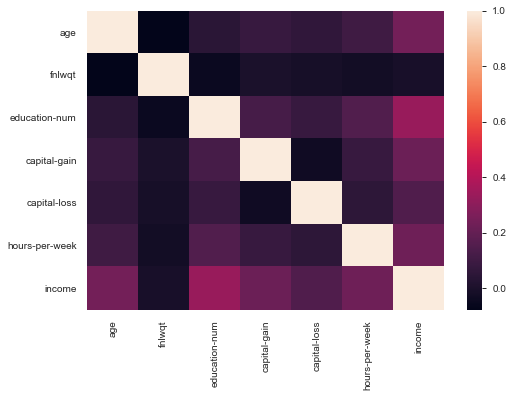

In [39]:
sns.heatmap(
   corrMat, 
    xticklabels=corrMat.columns.values,
    yticklabels=corrMat.columns.values
);

In [40]:
data1['Age-Disc'] = pd.cut(data1['age'], bins=[17,30,40,50,60,90], labels=['17-29','29-39','39-49','49-59','60-90'])
data1.head()

<ipython-input-40-d8310f10f40a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Age-Disc'] = pd.cut(data1['age'], bins=[17,30,40,50,60,90], labels=['17-29','29-39','39-49','49-59','60-90'])


age         workclass  fnlwqt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income Age-Disc  
0          2174             0              40  United-States       0    29-39  
1             0             0              13  United-States       0    39-49  
2             0             0              40  United-States       0    29-39  
3             0             0              40  United-States       0    49-59  
4             0             0              40           Cuba       0    17-29

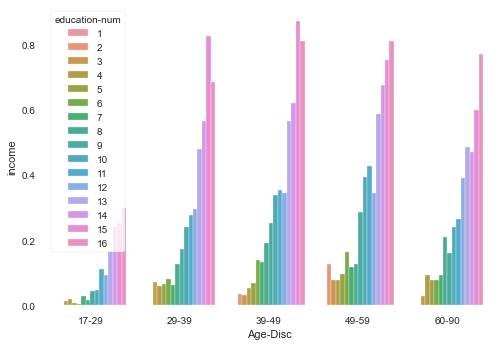

In [41]:
ax=sns.barplot(x='Age-Disc',y='income', data=data1,ci=None,hue='education-num')
plt.savefig('my_figure_income_age_barplot.png', transparent=True, bbox_inches='tight')

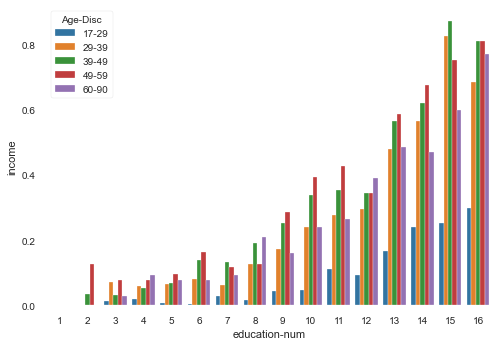

In [42]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='Age-Disc')
plt.savefig('figure_income_age_barplot.png', transparent=True, bbox_inches='tight')

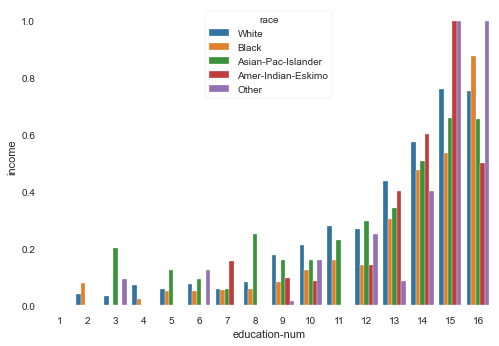

In [43]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='race')
plt.savefig('figure_income_race_barplot.png', transparent=True, bbox_inches='tight')

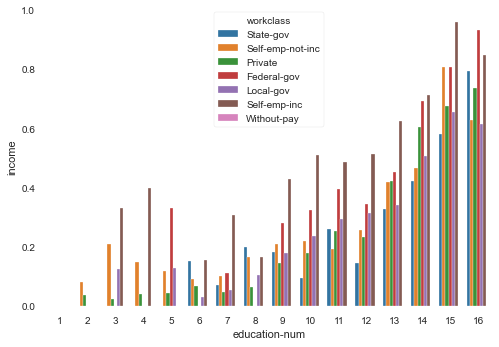

In [44]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='workclass')
plt.savefig('figure_income_workclass_barplot.png', transparent=True, bbox_inches='tight')

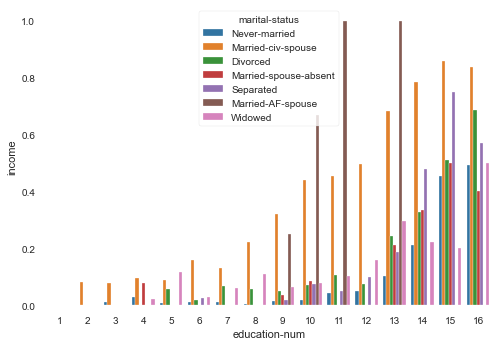

In [45]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='marital-status')
plt.savefig('figure_income_marital-status_barplot.png', transparent=True, bbox_inches='tight')

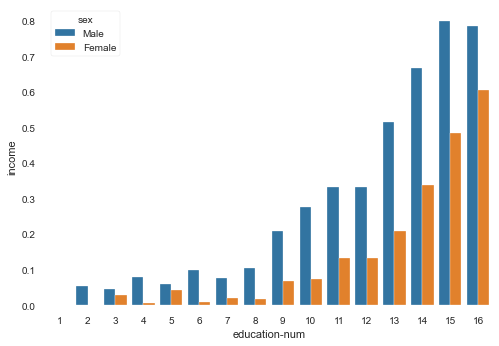

In [46]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='sex')
plt.savefig('figure_income_sex_barplot.png', transparent=True, bbox_inches='tight')

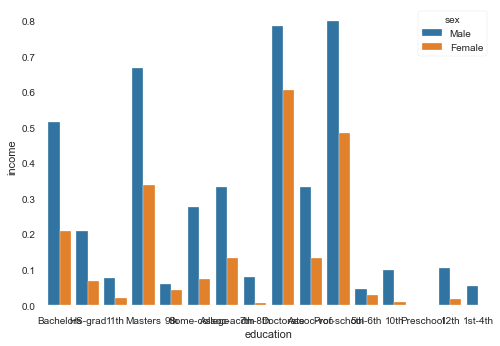

In [47]:
ax=sns.barplot(x='education',y='income', data=data1,ci=None,hue='sex')
plt.savefig('figure_income_sex_barplot2.png', transparent=True, bbox_inches='tight')

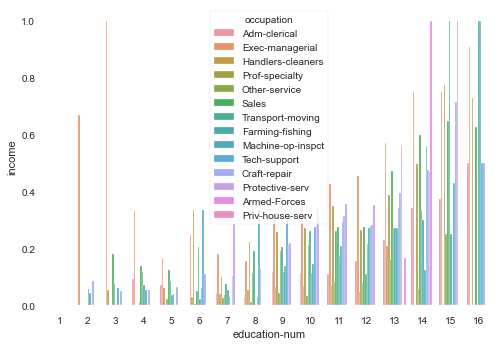

In [48]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='occupation')
plt.savefig('figure_income_occupation_barplot.png', transparent=True, bbox_inches='tight')

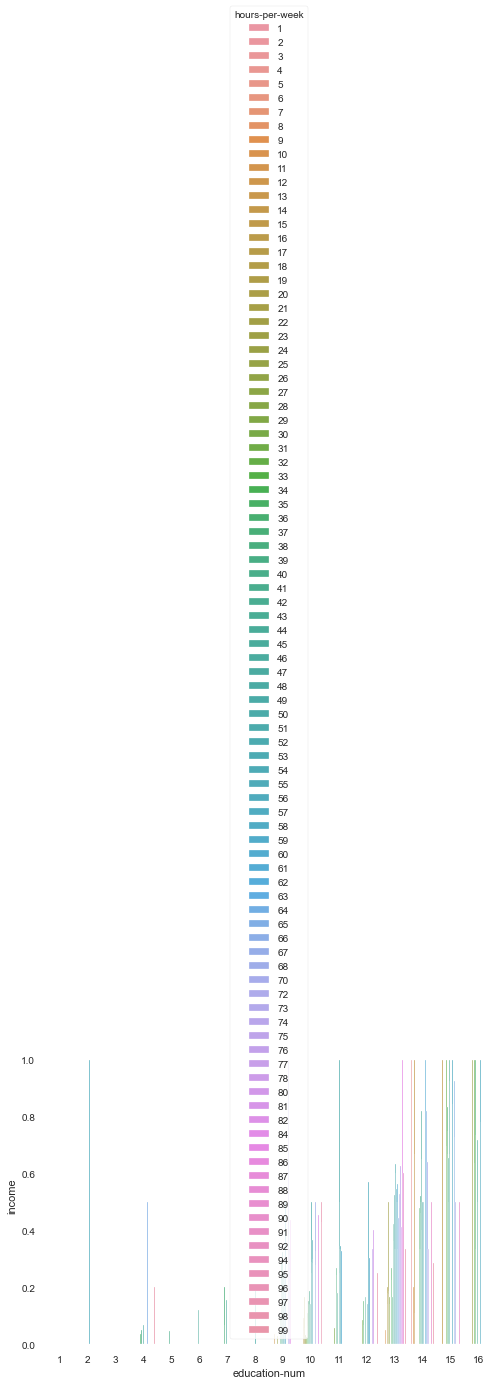

In [49]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='hours-per-week')
plt.savefig('figure_income_hours-per-week_barplot.png', transparent=True, bbox_inches='tight')

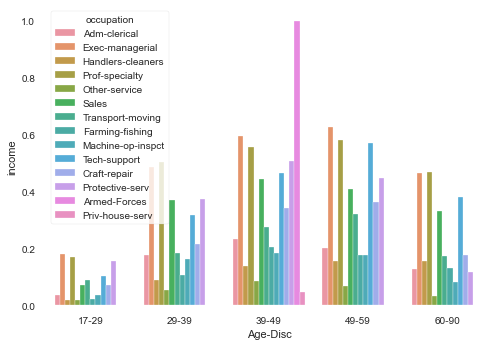

In [50]:
ax=sns.barplot(x='Age-Disc',y='income', data=data1,ci=None,hue='occupation')
plt.savefig('figure_income_sex_barplot.png', transparent=True, bbox_inches='tight')

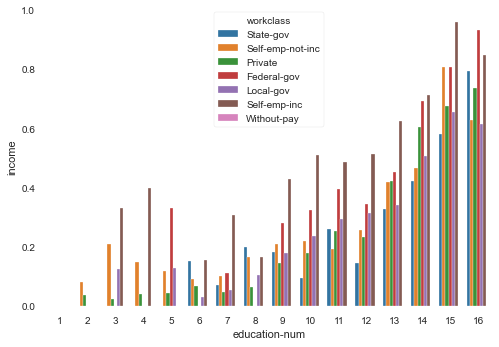

In [51]:
ax=sns.barplot(x='education-num',y='income', data=data1,ci=None,hue='workclass')
plt.savefig('figure_income_workclass_barplot.png', transparent=True, bbox_inches='tight')

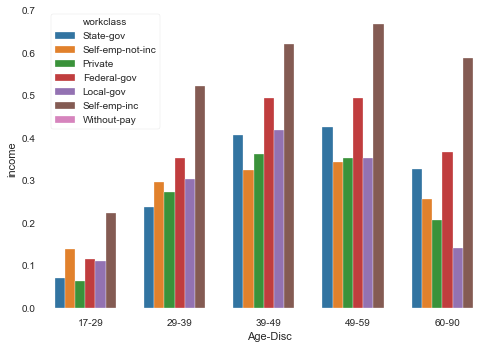

In [52]:
ax=sns.barplot(x='Age-Disc',y='income', data=data1,ci=None,hue='workclass')
plt.savefig('figure_income_workclass_barplot2.png', transparent=True, bbox_inches='tight')

In [54]:
data2=data1.drop('Age-Disc', axis=1)

In [55]:
data2.head()

age         workclass  fnlwqt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  income  
0          2174             0              40  United-States       0  
1             0             0              13  United-States       0  
2             0             0              40  United-States       0  
3             0             0              40  United-States       0  
4             0             0              40           Cuba       0

In [56]:
adultData=pd.get_dummies(data2)

In [57]:
adultData.head()

age  fnlwqt  education-num  capital-gain  capital-loss  hours-per-week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Private  ...  \
0       0                      0                    0                  0  ...   
1       0                      0                    0                  0  ...   
2       0                      0                    0                  1  ...   
3       0                      0                    0                  1  ...   
4       0                      0                    0                  1  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 105 columns]

In [58]:
header=adultData.dtypes.index

In [59]:
print(header)

Index(['age', 'fnlwqt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'workclass_Federal-gov',
       'workclass_Local-gov', 'workclass_Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=105)


In [60]:
k1=adultData.groupby('age')['income'].mean()
print(k1)

age
17    0.000000
18    0.000000
19    0.001695
20    0.000000
21    0.004847
        ...   
84    0.125000
85    0.000000
86    0.000000
88    0.000000
90    0.205882
Name: income, Length: 72, dtype: float64


In [61]:
test1['income']= label_encoder.fit_transform(test1['income']) 

<ipython-input-61-b37030fc3b5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['income']= label_encoder.fit_transform(test1['income'])


In [62]:
test1.head()

age  workclass    fnlwqt     education  education-num      marital-status  \
1  25    Private  226802.0          11th            7.0       Never-married   
2  38    Private   89814.0       HS-grad            9.0  Married-civ-spouse   
3  28  Local-gov  336951.0    Assoc-acdm           12.0  Married-civ-spouse   
4  44    Private  160323.0  Some-college           10.0  Married-civ-spouse   
6  34    Private  198693.0          10th            6.0       Never-married   

          occupation   relationship   race   sex  capital-gain  capital-loss  \
1  Machine-op-inspct      Own-child  Black  Male           0.0           0.0   
2    Farming-fishing        Husband  White  Male           0.0           0.0   
3    Protective-serv        Husband  White  Male           0.0           0.0   
4  Machine-op-inspct        Husband  Black  Male        7688.0           0.0   
6      Other-service  Not-in-family  White  Male           0.0           0.0   

   hours-per-week native-country  income  
1            40.0  United-States       0  
2            50.0  United-States       0  
3            40.0  United-States       1  
4            40.0  United-States       1  
6            30.0  United-States       0

In [63]:
test1['age']=pd.to_numeric(test1['age'], errors='coerce')

<ipython-input-63-2616ea584d6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['age']=pd.to_numeric(test1['age'], errors='coerce')


In [64]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15055 entries, 1 to 16281
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             15055 non-null  int64  
 1   workclass       15055 non-null  object 
 2   fnlwqt          15055 non-null  float64
 3   education       15055 non-null  object 
 4   education-num   15055 non-null  float64
 5   marital-status  15055 non-null  object 
 6   occupation      15055 non-null  object 
 7   relationship    15055 non-null  object 
 8   race            15055 non-null  object 
 9   sex             15055 non-null  object 
 10  capital-gain    15055 non-null  float64
 11  capital-loss    15055 non-null  float64
 12  hours-per-week  15055 non-null  float64
 13  native-country  15055 non-null  object 
 14  income          15055 non-null  int64  
dtypes: float64(5), int64(2), object(8)
memory usage: 1.8+ MB


In [65]:
testData=pd.get_dummies(test1)

In [66]:
testData.head()

age    fnlwqt  education-num  capital-gain  capital-loss  hours-per-week  \
1   25  226802.0            7.0           0.0           0.0            40.0   
2   38   89814.0            9.0           0.0           0.0            50.0   
3   28  336951.0           12.0           0.0           0.0            40.0   
4   44  160323.0           10.0        7688.0           0.0            40.0   
6   34  198693.0            6.0           0.0           0.0            30.0   

   income  workclass_Federal-gov  workclass_Local-gov  workclass_Private  ...  \
1       0                      0                    0                  1  ...   
2       0                      0                    0                  1  ...   
3       1                      0                    1                  0  ...   
4       1                      0                    0                  1  ...   
6       0                      0                    0                  1  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   
6                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   
6                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   
6                        0                               0   

   native-country_United-States  native-country_Vietnam  \
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             1                       0   
6                             1                       0   

   native-country_Yugoslavia  
1                          0  
2                          0  
3                          0  
4                          0  
6                          0  

[5 rows x 104 columns]

In [67]:
adultData=adultData.drop('fnlwqt', axis=1)

In [68]:
X=adultData.drop('income', axis=1)
y=adultData['income']

In [69]:
X.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
0   39             13          2174             0              40   
1   50             13             0             0              13   
2   38              9             0             0              40   
3   53              7             0             0              40   
4   28             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0                      0                    0                  0   
1                      0                    0                  0   
2                      0                    0                  1   
3                      0                    0                  1   
4                      0                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
0                       0                           0  ...   
1                       0                           1  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native-country_United-States  native-country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native-country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 103 columns]

(array([22633.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7506.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

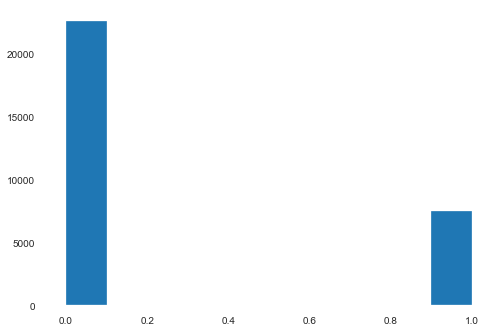

In [70]:
plt.hist(y)

In [72]:
algo = RandomForestClassifier()
algo.fit(X,y)
importance=algo.feature_importances_

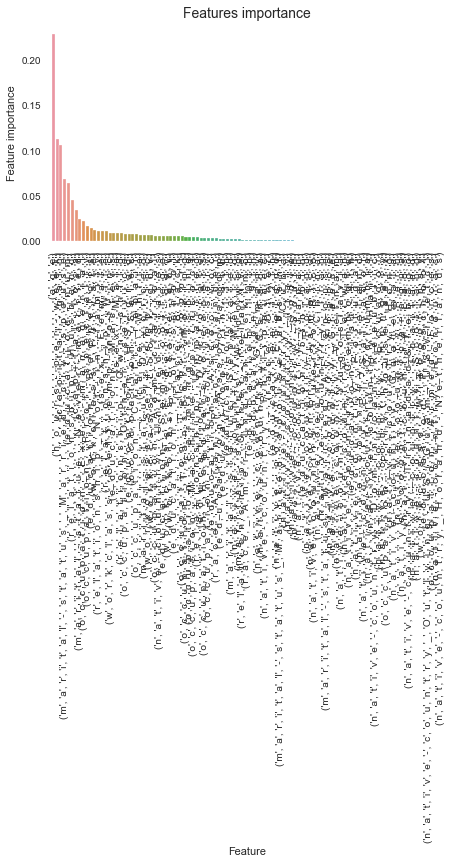

In [73]:
tmp = pd.DataFrame({'Feature': X, 'Feature importance': algo.feature_importances_})
tmp = tmp.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.savefig('Features Importance_Default', transparent=True, bbox_inches='tight')
plt.show()

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [75]:
algos_Class=[]
algos_Class.append(('Random Forest Classifier', RandomForestClassifier(max_depth=3)))
algos_Class.append(('Decision Trees Classifier', DecisionTreeClassifier(max_depth=3)))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier(max_depth=3)))

In [76]:
results=[]
names=[]
for name, model in algos_Class:
    result=cross_val_score(model, X, y, cv=3,scoring='accuracy')
    names.append(name)
    results.append(result)

In [77]:
for i in range(len(names)):
    print(names[i], results[i].mean())

Random Forest Classifier 0.793987906451464
Decision Trees Classifier 0.8400081531989773
Gradient Boosting Classifier 0.862006228830542


In [78]:
algoGB=GradientBoostingClassifier(max_depth=3)
modelGB=algoGB.fit(X_train,y_train)

In [79]:
predictions = modelGB.predict(X_test)
print(accuracy_score(y_test,predictions))

0.8615350586153506


In [80]:
testData=testData.drop('fnlwqt', axis=1)

In [81]:
X_1=testData.drop('income', axis=1)
y_1=testData['income']

In [82]:
X_1.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
1   25            7.0           0.0           0.0            40.0   
2   38            9.0           0.0           0.0            50.0   
3   28           12.0           0.0           0.0            40.0   
4   44           10.0        7688.0           0.0            40.0   
6   34            6.0           0.0           0.0            30.0   

   workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
1                      0                    0                  1   
2                      0                    0                  1   
3                      0                    1                  0   
4                      0                    0                  1   
6                      0                    0                  1   

   workclass_Self-emp-inc  workclass_Self-emp-not-inc  ...  \
1                       0                           0  ...   
2                       0                           0  ...   
3                       0                           0  ...   
4                       0                           0  ...   
6                       0                           0  ...   

   native-country_Portugal  native-country_Puerto-Rico  \
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   
6                        0                           0   

   native-country_Scotland  native-country_South  native-country_Taiwan  \
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   
6                        0                     0                      0   

   native-country_Thailand  native-country_Trinadad&Tobago  \
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   
6                        0                               0   

   native-country_United-States  native-country_Vietnam  \
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             1                       0   
6                             1                       0   

   native-country_Yugoslavia  
1                          0  
2                          0  
3                          0  
4                          0  
6                          0  

[5 rows x 102 columns]

(array([11355.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3700.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

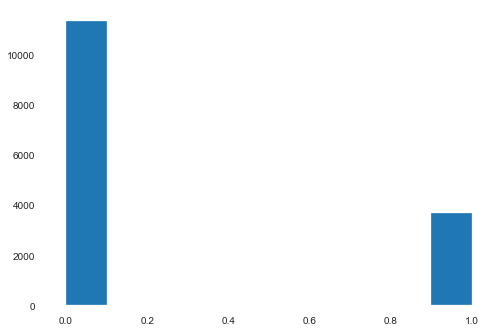

In [83]:
plt.hist(y_1)

In [84]:
finalPred = modelGB.predict(testData)

In [85]:
print(finalPred)

[0 0 0 ... 0 1 0]


(array([13763.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1292.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

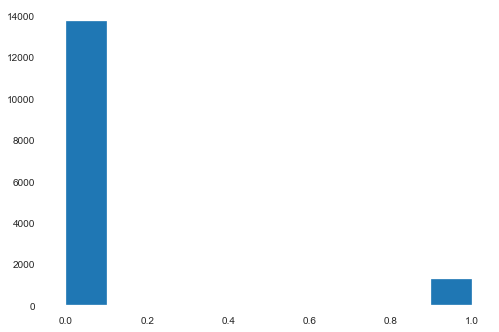

In [86]:
plt.hist(finalPred)

In [90]:
testData['finalPred']= finalPred

In [91]:
testData.to_csv('adult_testData.csv')